<a href="https://colab.research.google.com/github/GijuAhn/image-similarity-analysis/blob/main/NEW_FULL_SIMIL_FOR_LAMBDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

image1_path = '/content/arms1.jpg'
image2_path = '/content/arms2.jpg'
image3_path = '/content/rock.jpg'

In [ ]:
! python --version
print(cv2.__version__)

Python 3.9.16
4.7.0


# KAZE Feature Extraction

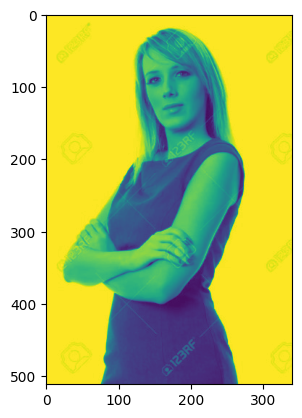

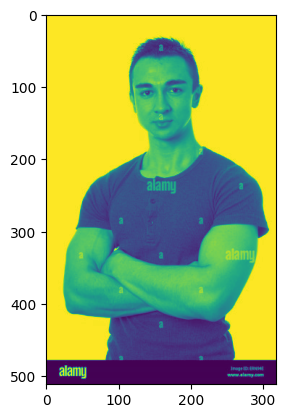

Similarity between the two images is:  0.40216625438017006


In [ ]:
# Version 1: KAZE feature 초기버전.

# Load the two images to compare
img1 = cv2.imread('/content/arms1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/arms2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the KAZE descriptor
kaze = cv2.KAZE_create()

# Detect and compute keypoints and descriptors for both images
kp1, des1 = kaze.detectAndCompute(img1, None)
kp2, des2 = kaze.detectAndCompute(img2, None)

# Create a Brute-Force matcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors between the two images
matches = bf.match(des1, des2)

# Sort matches in descending order of distance
matches = sorted(matches, key=lambda x:x.distance)

# Compute the similarity score
similarity = sum([match.distance for match in matches]) / len(matches)

# Print the similarity score
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
print("Similarity between the two images is: ", similarity)


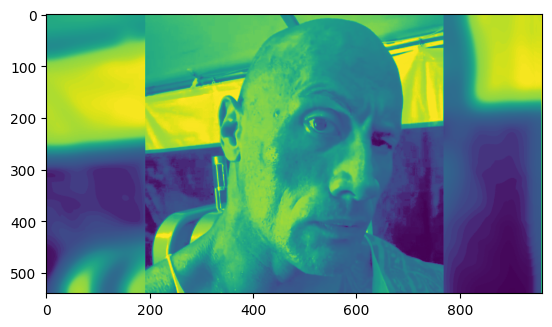

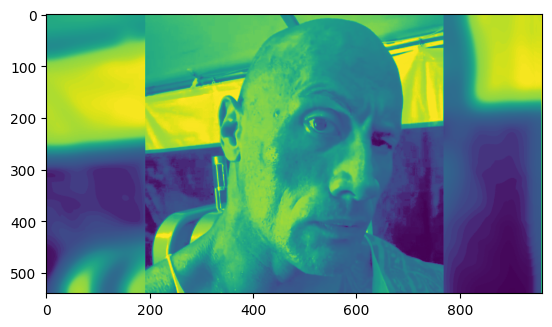

Similarity distance between the two images is:  0.0


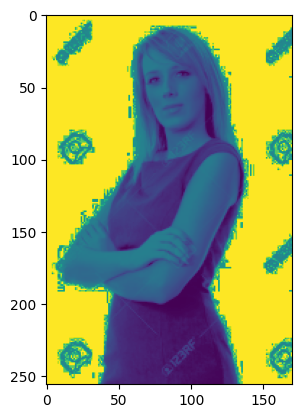

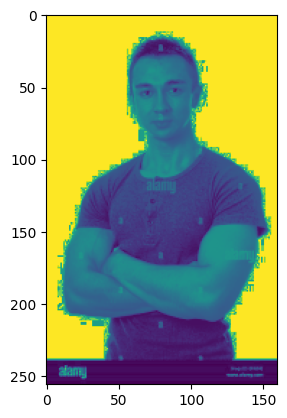

Similarity distance between the two images is:  0.38685911893844604


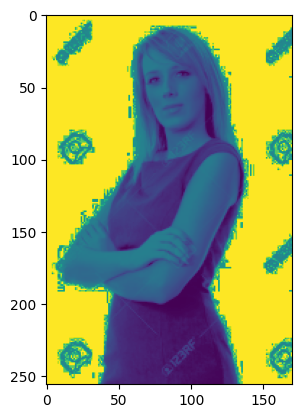

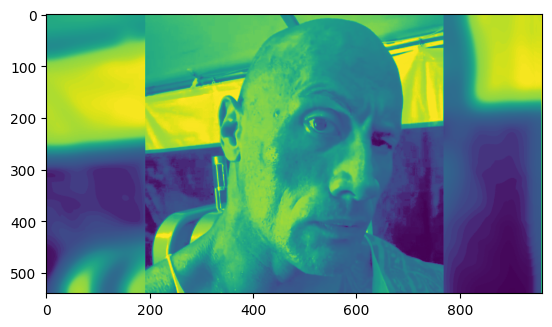

Similarity distance between the two images is:  0.3410160392522812


In [ ]:
# Version2 : 이미지 정규화 전처리 적용 + 브루트포스 매칭 대신 FLANN 사용,
#   Bad matcher 에 대해 threshold 적용

# Load the two images to compare
img1 = cv2.imread('/content/arms1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/arms2.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/content/rock.jpg', cv2.IMREAD_GRAYSCALE)

# Preprocess the images
img1 = cv2.equalizeHist(img1)
img2 = cv2.equalizeHist(img2)
img3 = cv2.equalizeHist(img3)

img1 = cv2.resize(img1, (0, 0), fx=0.5, fy=0.5)
img2 = cv2.resize(img2, (0, 0), fx=0.5, fy=0.5)
img3 = cv2.resize(img3, (0, 0), fx=0.5, fy=0.5)

# Initialize the KAZE descriptor
kaze = cv2.KAZE_create()

# Set KAZE parameters
kaze.setExtended(True)
kaze.setNOctaves(4)
kaze.setNOctaveLayers(4)
kaze.setThreshold(0.001)

# Detect and compute keypoints and descriptors for both images
kp1, des1 = kaze.detectAndCompute(img1, None)
kp2, des2 = kaze.detectAndCompute(img2, None)
kp3, des3 = kaze.detectAndCompute(img3, None)

# Create a FLANN matcher object
flann = cv2.FlannBasedMatcher({'algorithm': 0, 'trees': 5}, {'checks': 50})





# Match descriptors between the two images
matches33 = flann.knnMatch(des3, des3, k=2)

# Filter matches33 using Lowe's ratio test
good_matches = []
for m, n in matches33:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Compute the similarity score
similarity = sum([match.distance for match in good_matches]) / len(good_matches)

# Print the similarity score
plt.imshow(img3)
plt.show()
plt.imshow(img3)
plt.show()
print("Similarity distance between the two images is: ", similarity)




# Match descriptors between the two images
matches12 = flann.knnMatch(des1, des2, k=2)

# Filter matches12 using Lowe's ratio test
good_matches = []
for m, n in matches12:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Compute the similarity score
similarity = sum([match.distance for match in good_matches]) / len(good_matches)

# Print the similarity score
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
print("Similarity distance between the two images is: ", similarity)





# Match descriptors between the two images
matches13 = flann.knnMatch(des1, des3, k=2)

# Filter matches13 using Lowe's ratio test
good_matches = []
for m, n in matches13:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Compute the similarity score
similarity = sum([match.distance for match in good_matches]) / len(good_matches)

# Print the similarity score
plt.imshow(img1)
plt.show()
plt.imshow(img3)
plt.show()
print("Similarity distance between the two images is: ", similarity)






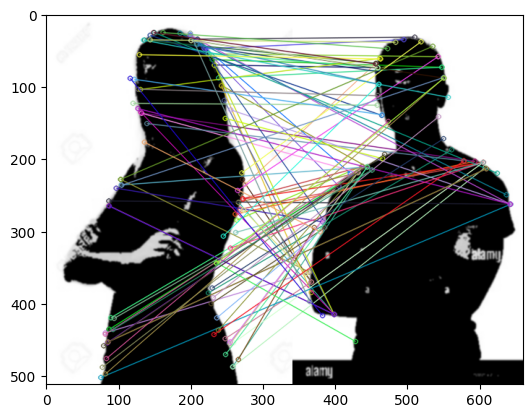

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(img_path):
    # Read the image from file
    img = cv2.imread(img_path)
    
    # Convert the image to uint8 data type
    img = img.astype(np.uint8)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to create a mask
    _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    
    # Apply the mask to the original image
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    
    # Convert the masked image to grayscale
    masked_gray = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blurring to the masked grayscale image
    blurred = cv2.GaussianBlur(masked_gray, (5, 5), 0)
    
    return blurred

# Load the two images
img1 = preprocess_image('/content/arms1.jpg')
img2 = preprocess_image('/content/arms2.jpg')

# Initialize the KAZE feature extractor
kaze = cv2.KAZE_create()

# Detect and compute the keypoints and descriptors for the two images
kp1, des1 = kaze.detectAndCompute(img1, None)
kp2, des2 = kaze.detectAndCompute(img2, None)

# Create a Brute Force matcher object
bf = cv2.BFMatcher()

# Match the keypoints in the two images using the Brute Force matcher
matches = bf.match(des1, des2)

# Sort the matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the image
plt.imshow(img_matches)
plt.show()


In [ ]:

# def preprocess_image(image_path):
#     image = cv2.imread(image_path)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     blur = cv2.GaussianBlur(gray, (5, 5), 0)
#     _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     mask = np.zeros_like(gray)
#     mask[thresh > 0] = 255
#     fg_model = np.zeros((1, 65), dtype=np.float64)
#     bg_model = np.zeros((1, 65), dtype=np.float64)
#     rect = cv2.boundingRect(mask)
#     x, y, w, h = rect
#     cv2.grabCut(image, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)
#     mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#     image = image*mask2[:,:,np.newaxis]
#     return image

# def get_image_similarity(image1_path, image2_path):
#     image1 = preprocess_image(image1_path)
#     image2 = preprocess_image(image2_path)

#     # Initialize KAZE feature extractor and descriptor
#     kaze = cv2.KAZE_create()

#     # Find keypoints and descriptors in both images
#     kp1, des1 = kaze.detectAndCompute(image1, None)
#     kp2, des2 = kaze.detectAndCompute(image2, None)

#     # Initialize Brute-Force Matcher
#     bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

#     # Match descriptors
#     matches = bf.match(des1, des2)

#     # Sort matches by distance
#     matches = sorted(matches, key=lambda x:x.distance)

#     # Calculate similarity score
#     similarity = sum([match.distance for match in matches]) / len(matches)

#     return similarity

# image1_path = '/content/rock.jpg'
# image2_path = '/content/rock.jpg'

# get_image_similarity(image1_path, image2_path)

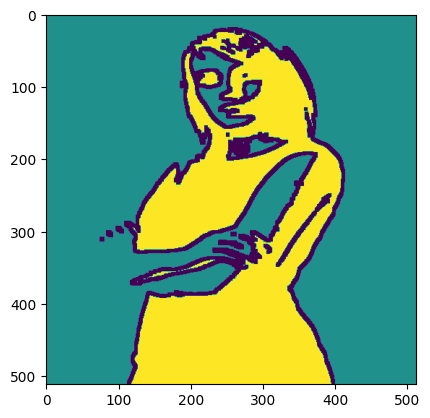

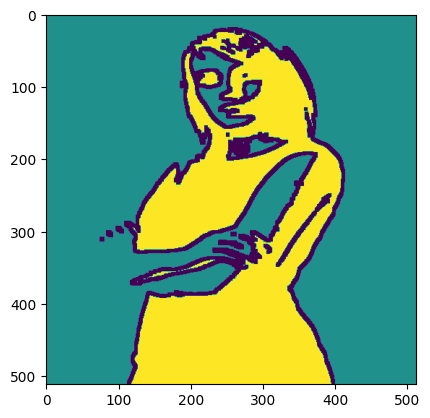

Similarity distance: 0.0
--- 1.068312644958496 seconds ---


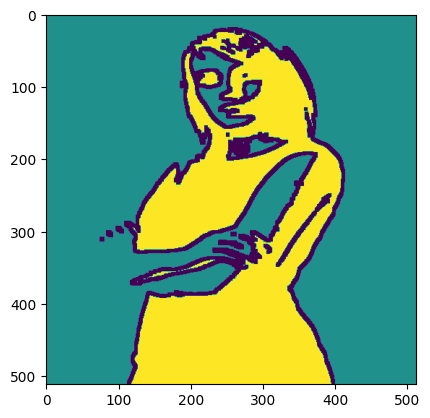

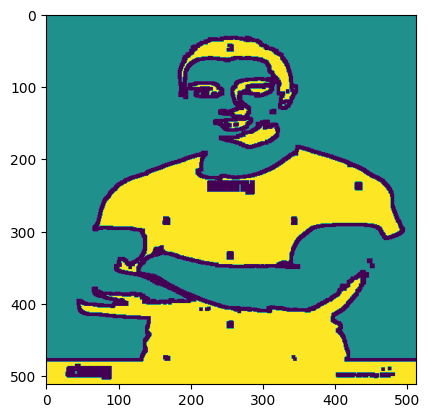

Similarity distance: 0.42892282870934184
--- 0.9213123321533203 seconds ---


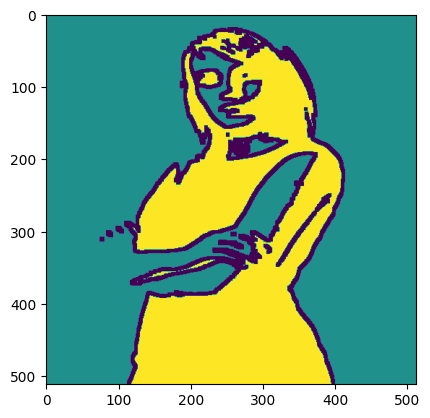

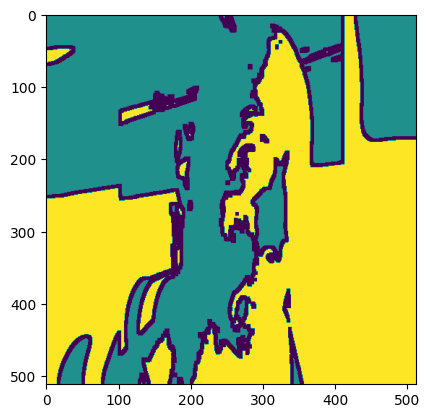

Similarity distance: 0.4231335426011856
--- 3.6831398010253906 seconds ---


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (512, 512))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh = cv2.bitwise_not(thresh)
    fg = cv2.erode(thresh, None, iterations=2)
    bg = cv2.dilate(thresh, None, iterations=3)
    _, bg = cv2.threshold(bg, 1, 128, cv2.THRESH_BINARY_INV)
    marker = cv2.add(fg, bg)
    return marker

def measure_similarity(image_path1, image_path2):
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    # Preprocess images
    marker1 = preprocess_image(image_path1)
    plt.imshow(marker1)
    plt.show()
    marker2 = preprocess_image(image_path2)
    plt.imshow(marker2)
    plt.show()

    # KAZE feature extraction
    kaze = cv2.KAZE_create()
    keypoints1, descriptors1 = kaze.detectAndCompute(img1, marker1)
    keypoints2, descriptors2 = kaze.detectAndCompute(img2, marker2)

    # Brute-force matching
    matcher = cv2.BFMatcher()
    matches = matcher.match(descriptors1, descriptors2)

    # Calculate similarity score
    score = np.sum([match.distance for match in matches]) / len(matches)
    # the lower the score(distance), the more similar the images
    return score

# Test the function with example images
image1_path = '/content/arms1.jpg'
image2_path = '/content/arms2.jpg'
image3_path = '/content/rock.jpg'

start_time1 = time.time()
scoreSame = measure_similarity(image1_path, image1_path)
print('Similarity distance:', scoreSame)
print("--- %s seconds ---" % (time.time() - start_time1))

start_time2 = time.time()
scoreArms = measure_similarity(image1_path, image2_path)
print('Similarity distance:', scoreArms)
print("--- %s seconds ---" % (time.time() - start_time2))

start_time3 = time.time()
scoreRock = measure_similarity(image1_path, image3_path)
print('Similarity distance:', scoreRock)
print("--- %s seconds ---" % (time.time() - start_time3))


In [ ]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# def preprocess_image(img):
#     # Convert the image to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = cv2.resize(gray, (512, 512))
    
#     # Apply thresholding to remove the background
#     _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    
#     # Find the contours of the objects in the image
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     # Create a mask for the objects in the image
#     mask = np.zeros_like(gray)
#     cv2.drawContours(mask, contours, -1, 255, -1)
    
#     # Apply the mask to the image
#     masked_image = cv2.bitwise_and(img, img, mask=mask)
    
#     return masked_image

# def match_images(img1, img2):
#     # Preprocess the images to remove the background
#     img1 = preprocess_image(img1)
#     img2 = preprocess_image(img2)
    
#     # Create the KAZE object
#     kaze = cv2.KAZE_create()
    
#     # Find the keypoints and descriptors with KAZE
#     kp1, des1 = kaze.detectAndCompute(img1, None)
#     kp2, des2 = kaze.detectAndCompute(img2, None)
    
#     # Create the BFMatcher object
#     bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    
#     # Match the descriptors
#     try:
#         matches = bf.match(des1, des2)
#     except cv2.error:
#         return None
    
#     # Sort the matches by distance
#     matches = sorted(matches, key=lambda x:x.distance)
    
#     # Draw the top matches
#     img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
#     # Calculate the similarity score
#     similarity = sum([match.distance for match in matches]) / len(matches)
    
#     return img3, similarity

# # Load the images
# img1 = cv2.imread('/content/arms1.jpg')
# img2 = cv2.imread('/content/arms2.jpg')
# img3 = cv2.imread('/content/rock.jpg')

# # Match the images
# result33 = match_images(img3, img3)
# result12 = match_images(img1, img2)
# result13 = match_images(img1, img3)


# # Check if the match was successful
# if result33 is None:
#     print("Error: No matches found")
# else:
#     # Display the result12
#     plt.imshow(result33[0])
#     plt.title("Similarity distance: {:.5f}".format(result33[1]))
#     plt.show()

# # Check if the match was successful
# if result12 is None:
#     print("Error: No matches found")
# else:
#     # Display the result12
#     plt.imshow(result12[0])
#     plt.title("Similarity distance: {:.5f}".format(result12[1]))
#     plt.show()

# # Check if the match was successful
# if result13 is None:
#     print("Error: No matches found")
# else:
#     # Display the result13
#     plt.imshow(result13[0])
#     plt.title("Similarity distance: {:.5f}".format(result13[1]))
#     plt.show()


Similarity score: 100.0
--- 1.1285171508789062 seconds ---


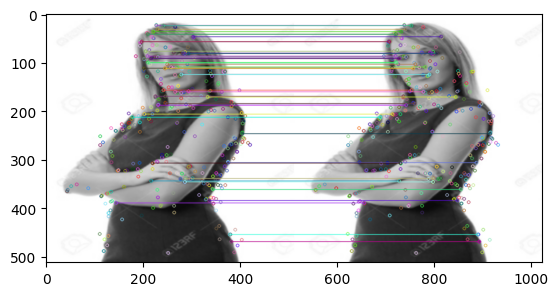

Similarity score: 4.275363663055188
--- 1.031857967376709 seconds ---


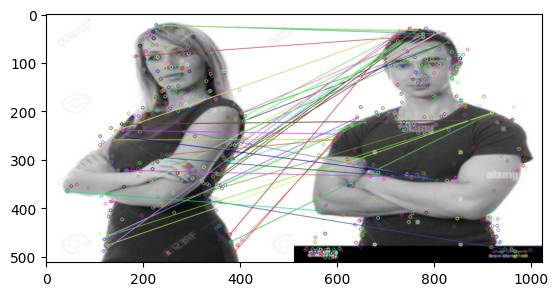

Similarity score: 3.016114189019193
--- 0.6693935394287109 seconds ---


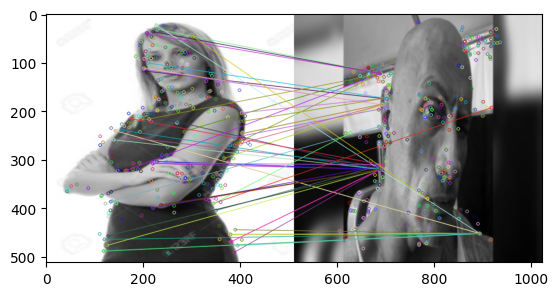

(<matplotlib.image.AxesImage at 0x7fa455989f10>, None)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    norm_gray = cv2.normalize(gray,  gray, 0, 255, cv2.NORM_MINMAX)
    # Resize to a fixed size
    resized = cv2.resize(norm_gray, (512, 512))
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)
    return blurred

def compute_similarity(img1, img2):
    # Preprocess images
    img1_processed = preprocess_image(img1)
    img2_processed = preprocess_image(img2)
    
    # Create KAZE detector and extractor
    kaze = cv2.KAZE_create()
    
    # Detect keypoints and extract features
    kp1, des1 = kaze.detectAndCompute(img1_processed, None)
    kp2, des2 = kaze.detectAndCompute(img2_processed, None)
    
    # Match features using FLANN matcher
    matcher = cv2.FlannBasedMatcher()
    matches = list(matcher.match(des1, des2))
    
    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)
    
    # Compute similarity score
    score = 0.0
    num_good_matches = int(len(matches) * 0.15)
    for i in range(num_good_matches):
        score += matches[i].distance
    score /= num_good_matches
    score = np.reciprocal(score+0.01)
    
    # Draw top matches
    img_matches = cv2.drawMatches(img1_processed, kp1, img2_processed, kp2, matches[:num_good_matches], None)
    # the higher the score, the more similar the images
    return score, img_matches



# Load the images
img1 = cv2.imread('/content/arms1.jpg')
img2 = cv2.imread('/content/arms2.jpg')
img3 = cv2.imread('/content/rock.jpg')


# Compute similarity
start_time1 = time.time()
score11, img_matches11 = compute_similarity(img1, img1)
# Print similarity score and show matches
print("Similarity score:", score11)
print("--- %s seconds ---" % (time.time() - start_time1))
plt.imshow(img_matches11), plt.show()


start_time2 = time.time()
score12, img_matches12 = compute_similarity(img1, img2)
# Print similarity score and show matches
print("Similarity score:", score12)
print("--- %s seconds ---" % (time.time() - start_time2))
plt.imshow(img_matches12), plt.show()


start_time3 = time.time()
# Print similarity score and show matches
score13, img_matches13 = compute_similarity(img1, img3)
print("Similarity score:", score13)
print("--- %s seconds ---" % (time.time() - start_time3))
plt.imshow(img_matches13), plt.show()





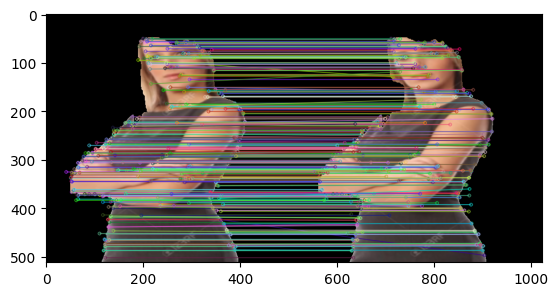

0.7344398340248963
--- 3.4658565521240234 seconds ---


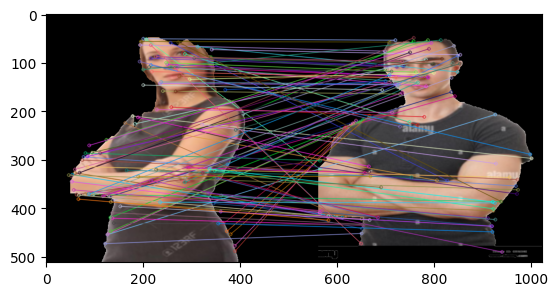

0.23395445134575568
--- 3.4563515186309814 seconds ---


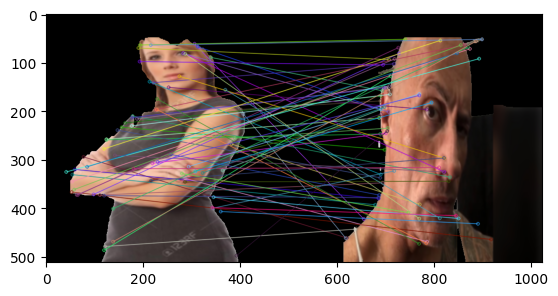

0.15164835164835164
--- 7.224426746368408 seconds ---


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    # skip grayscaling for remove background
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    return blur


def extract_kaze_features(img):
    kaze = cv2.KAZE_create()
    keypoints, descriptors = kaze.detectAndCompute(img, None)
    return keypoints, descriptors


def match_kaze_features(desc1, desc2):
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = bf.match(desc1, desc2)
    return matches


def draw_matches(img1, kp1, img2, kp2, matches):
    img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
    cv2.drawMatches(img1, kp1, img2, kp2, matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.show()


def remove_background(img):
    # img = cv2.imread(img_path)
    mask = np.zeros(img.shape[:2], np.uint8)
    bgd_model = np.zeros((1,65), np.float64)
    fgd_model = np.zeros((1,65), np.float64)
    rect = (50, 50, img.shape[1]-50, img.shape[0]-50)
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    img = img*mask2[:, :, np.newaxis]
    return img


def measure_similarity(img_path1, img_path2):
    img1 = preprocess_image(img_path1)
    img2 = preprocess_image(img_path2)

    img1 = remove_background(img1)
    img2 = remove_background(img2)

    kp1, desc1 = extract_kaze_features(img1)
    kp2, desc2 = extract_kaze_features(img2)

    matches = match_kaze_features(desc1, desc2)

    draw_matches(img1, kp1, img2, kp2, matches)

    score = len(matches) / float(max(len(desc1), len(desc2)))
    # the higher the score, the more similar the images
    return score


# Load the images
img1 = '/content/arms1.jpg'
img2 = '/content/arms2.jpg'
img3 = '/content/rock.jpg'


start_time1 = time.time()
print(measure_similarity(img1,img1))
print("--- %s seconds ---" % (time.time() - start_time1))

start_time2 = time.time()
print(measure_similarity(img1,img2))
print("--- %s seconds ---" % (time.time() - start_time2))

start_time3 = time.time()
print(measure_similarity(img1,img3))
print("--- %s seconds ---" % (time.time() - start_time3))

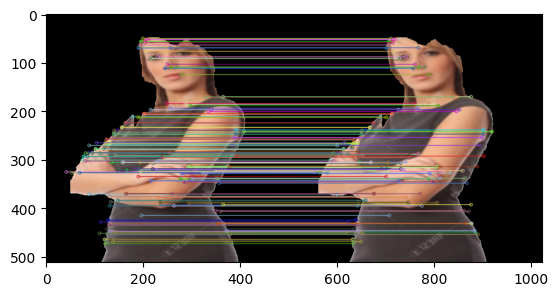

0.38611713665943603
--- 3.3913302421569824 seconds ---


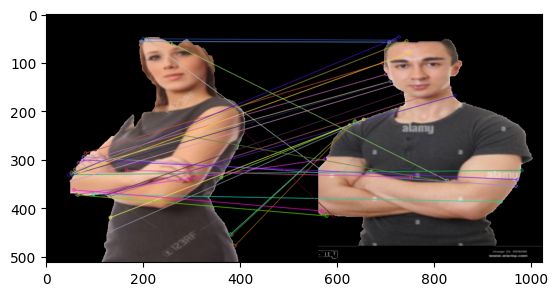

0.0611439842209073
--- 4.176924467086792 seconds ---


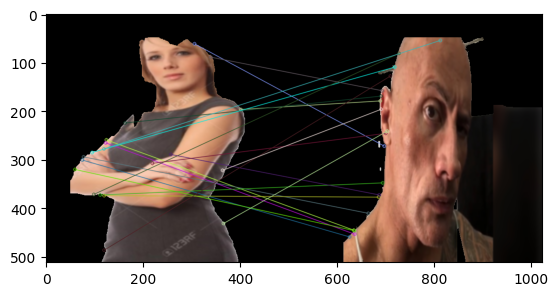

0.04148471615720524
--- 7.948273420333862 seconds ---


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    # skip grayscaling for remove background
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    return blur


def extract_kaze_features(img):
    kaze = cv2.KAZE_create()
    keypoints, descriptors = kaze.detectAndCompute(img, None)
    return keypoints, descriptors


def match_kaze_features(desc1, desc2):
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = bf.match(desc1, desc2)
    return matches


def filter_matches(matches, ratio=0.75):
    distances = [m.distance for m in matches]
    cutoff = np.median(distances) * ratio
    good_matches = [m for m in matches if m.distance < cutoff]
    return good_matches


def draw_matches(img1, kp1, img2, kp2, matches):
    img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
    cv2.drawMatches(img1, kp1, img2, kp2, matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.show()


def remove_background(img):
    # img = cv2.imread(img_path)
    mask = np.zeros(img.shape[:2], np.uint8)
    bgd_model = np.zeros((1,65), np.float64)
    fgd_model = np.zeros((1,65), np.float64)
    rect = (50, 50, img.shape[1]-50, img.shape[0]-50)
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    img = img*mask2[:, :, np.newaxis]
    return img


def measure_similarity(img_path1, img_path2):
    img1 = preprocess_image(img_path1)
    img2 = preprocess_image(img_path2)

    img1 = remove_background(img1)
    img2 = remove_background(img2)

    kp1, desc1 = extract_kaze_features(img1)
    kp2, desc2 = extract_kaze_features(img2)

    matches = match_kaze_features(desc1, desc2)

    good_matches = filter_matches(matches)

    draw_matches(img1, kp1, img2, kp2, good_matches)

    score = len(good_matches) / float(max(len(desc1), len(desc2)))
    # the higher the score, the more similar the images
    return score


# Load the images
img1 = '/content/arms1.jpg'
img2 = '/content/arms2.jpg'
img3 = '/content/rock.jpg'

start_time1 = time.time()
print(measure_similarity(img1,img1))
print("--- %s seconds ---" % (time.time() - start_time1))

start_time2 = time.time()
print(measure_similarity(img1,img2))
print("--- %s seconds ---" % (time.time() - start_time2))

start_time3 = time.time()
print(measure_similarity(img1,img3))
print("--- %s seconds ---" % (time.time() - start_time3))

간단한 전처리만하고 
1000 점 만점에 정확도차이가 1.5배고 1.5차이, 0.5초

1점 만점에 정확도차이가 2배고 0.1차이, 40초

# Histogram Analysis

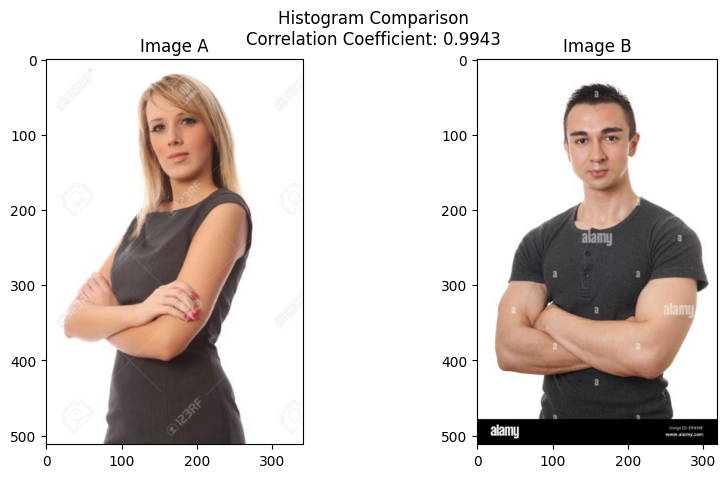

--- 0.4891057014465332 seconds ---


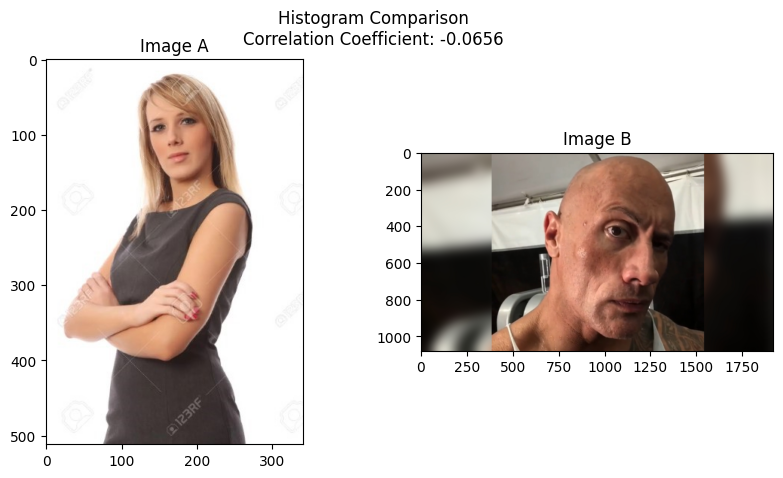

--- 0.8744494915008545 seconds ---


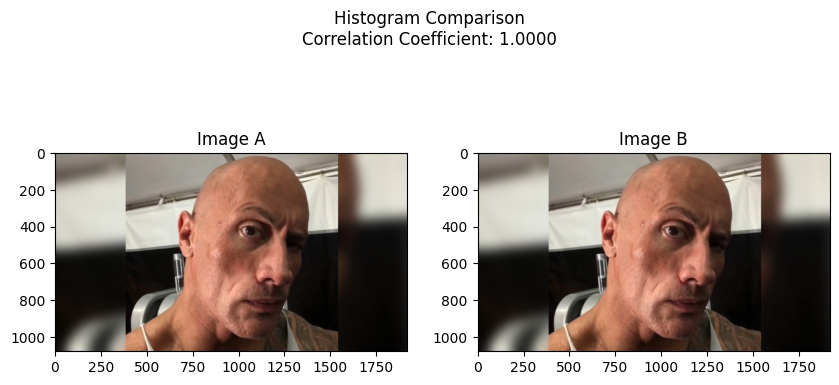

--- 1.0662569999694824 seconds ---


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def histogram_analysis(image1_path, image2_path):
    # Load the images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate the histograms
    hist_image1 = cv2.calcHist([gray_image1], [0], None, [256], [0, 256])
    hist_image2 = cv2.calcHist([gray_image2], [0], None, [256], [0, 256])

    # Normalize the histograms
    cv2.normalize(hist_image1, hist_image1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(hist_image2, hist_image2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Calculate the correlation coefficient between the histograms
    correlation_coefficient = cv2.compareHist(hist_image1, hist_image2, cv2.HISTCMP_CORREL)

    # Display the images and the correlation coefficient
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Image A')
    axs[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Image B')
    plt.suptitle('Histogram Comparison\nCorrelation Coefficient: {:.4f}'.format(correlation_coefficient))
    plt.show()

    return correlation_coefficient

start_time1 = time.time()
histogram_analysis(image1_path, image2_path)
print("--- %s seconds ---" % (time.time() - start_time1))

start_time1 = time.time()
histogram_analysis(image1_path, image3_path)
print("--- %s seconds ---" % (time.time() - start_time1))

start_time1 = time.time()
histogram_analysis(image3_path, image3_path)
print("--- %s seconds ---" % (time.time() - start_time1))

# Perceptual Hahsing

In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize image to 16x16
    img = cv2.resize(img, (16, 16))
    return img

def calculate_dct_coefficients(img):
    # Calculate DCT coefficients
    dct_coeffs = cv2.dct(np.float32(img))
    # Keep top-left 4x4 coefficients
    dct_coeffs = dct_coeffs[:4, :4]
    return dct_coeffs

def hash_image(image_path):
    # Preprocess image
    img = preprocess_image(image_path)
    # Calculate DCT coefficients
    dct_coeffs = calculate_dct_coefficients(img)
    # Compute median of coefficients
    median = np.median(dct_coeffs)
    # Threshold coefficients to generate hash
    hash = (dct_coeffs > median).flatten()
    return hash

def hamming_distance(hash1, hash2):
    # Calculate Hamming distance between two hashes
    return np.sum(hash1 != hash2)

def measure_similarity(image_path1, image_path2):
    # Calculate perceptual hash for both images
    hash1 = hash_image(image_path1)
    hash2 = hash_image(image_path2)
    # Compute Hamming distance between the two hashes
    distance = hamming_distance(hash1, hash2)
    # Compute similarity score
    score = 1 - (distance / float(hash1.size))
    # the higher the score, the more similar the images
    return score

# Example usage
img1 = '/content/arms1.jpg'
img2 = '/content/arms2.jpg'
img3 = '/content/rock.jpg'


start_time1 = time.time()
print(measure_similarity(img1,img1))
print("--- %s seconds ---" % (time.time() - start_time1))

start_time1 = time.time()
print(measure_similarity(img1,img2))
print("--- %s seconds ---" % (time.time() - start_time1))

start_time1 = time.time()
print(measure_similarity(img1,img3))
print("--- %s seconds ---" % (time.time() - start_time1))




1.0
--- 0.005761623382568359 seconds ---
0.875
--- 0.004189729690551758 seconds ---
0.5
--- 0.03503108024597168 seconds ---


# SSIM

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim


def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (512, 512))
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    return blur


def remove_background(img):
    # img = cv2.imread(img_path)
    mask = np.zeros(img.shape[:2], np.uint8)
    bgd_model = np.zeros((1,65), np.float64)
    fgd_model = np.zeros((1,65), np.float64)
    rect = (50, 50, img.shape[1]-50, img.shape[0]-50)
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    img = img*mask2[:, :, np.newaxis]
    return img


def measure_similarity(img_path1, img_path2):

    img1 = preprocess_image(img_path1)
    img2 = preprocess_image(img_path2)
    
    img1 = remove_background(img1)
    img2 = remove_background(img2)

    score = ssim(img1, img2, multichannel=True)

    # the higher the score, the more similar the images
    return score


# Example usage
img1 = '/content/arms1.jpg'
img2 = '/content/arms2.jpg'
img3 = '/content/rock.jpg'


start_time1 = time.time()
print(measure_similarity(img1,img1))
print("--- %s seconds ---" % (time.time() - start_time1))

start_time1 = time.time()
print(measure_similarity(img1,img2))
print("--- %s seconds ---" % (time.time() - start_time1))

start_time1 = time.time()
print(measure_similarity(img1,img3))
print("--- %s seconds ---" % (time.time() - start_time1))


<ipython-input-89-23672f1134ce>:33: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  score = ssim(img1, img2, multichannel=True)


0.9958162808441603
--- 2.4057254791259766 seconds ---
0.5978161306028306
--- 2.990023612976074 seconds ---
0.533828247746377
--- 4.936801910400391 seconds ---


---
# kaze feature

시간은 512*512px resizing with gaussian blur + remove background 기준 5초정도

feature filtering 안하면 = 모든 feature matching 고려

똑같은 사진이 0.86

비슷한 사진이 0.22

다른 사진이 0.16


feature filtering 하면 = 모든 matcher 중 중위값을 넘는 good matching 만 고려

똑같은 사진이 0.35

비슷한 사진이 0.061

다른 사진이 0.037

▶[good matcher 에 가중치 3배주고 더했을 때 예상값 범위는 1~2 정도]


---
# Histogram Analysis

시간은 1.5초 정도

같은그림 1

비슷한그림 0.99 (흰배경에 사람만 있는 경우)

다른그림 -0.065 (배경 다르나 일단 사람임)

▶[값 범위 -1~+1]


---
# Perceptual Hashing

시간은 0.05초 정도

같은 그림 1

비슷한 그림 0.875

다른 그림 0.5

▶[값 범위 0~1]


---
# SSIM

시간은 1초 정도

같은그림 0.984

비슷한그림 0.598

다른그림 0.535

▶[값 범위 0~1]

---


